<center style="font-family: consolas">
    <h1 style="line-height: 7px;"> Sukkur IBA Unviersity</h1>
    <h2 style="line-height:7px"> Data Science</h2>
    <h2 style="line-height:7px"> Spring 2020 Mid I Exam</h2>
    <h3 style="line-height:7px"> BS(CS) - VIII</h3>
</center>

<font style="font-family: consolas">
Instructor: Saif Hassan<br>
Student ID: 053-16-0028<br>
Student Name: Parvez Ali<br>
Date: 18<sup>th</sup> Feb, 2020<br>
</font>

# `Multi-class Weather Image Classification`

### `You have been provided this .ipynb file and dataset having four classes (cloudy, rain, shine and sunrise)`
### `All the images are labeled classwise, perform all the following tasks`

In [3]:
'''
# 1- Import all possible required libraries here
'''

# Write your code here
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
#libraries for model
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.


In [14]:
'''
# 2- Load the dataset and count how many total instances are in complete dataset (Display the results)?
'''

# Write your code here
dataset_dir ='weather-image-classification'
images = os.listdir(dataset_dir)
total_instances =len(images)
print('Total instances in Dataset are: ',total_instances)
print(images)


Total instances in Dataset are:  1125
['cloudy1.jpg', 'cloudy10.jpg', 'cloudy100.jpg', 'cloudy101.jpg', 'cloudy102.jpg', 'cloudy103.jpg', 'cloudy104.jpg', 'cloudy105.jpg', 'cloudy106.jpg', 'cloudy107.jpg', 'cloudy108.jpg', 'cloudy109.jpg', 'cloudy11.jpg', 'cloudy110.jpg', 'cloudy111.jpg', 'cloudy112.jpg', 'cloudy113.jpg', 'cloudy114.jpg', 'cloudy115.jpg', 'cloudy116.jpg', 'cloudy117.jpg', 'cloudy118.jpg', 'cloudy119.jpg', 'cloudy12.jpg', 'cloudy120.jpg', 'cloudy121.jpg', 'cloudy122.jpg', 'cloudy123.jpg', 'cloudy124.jpg', 'cloudy125.jpg', 'cloudy126.jpg', 'cloudy127.jpg', 'cloudy128.jpg', 'cloudy129.jpg', 'cloudy13.jpg', 'cloudy130.jpg', 'cloudy131.jpg', 'cloudy132.jpg', 'cloudy133.jpg', 'cloudy134.jpg', 'cloudy135.jpg', 'cloudy136.jpg', 'cloudy137.jpg', 'cloudy138.jpg', 'cloudy139.jpg', 'cloudy14.jpg', 'cloudy140.jpg', 'cloudy141.jpg', 'cloudy142.jpg', 'cloudy143.jpg', 'cloudy144.jpg', 'cloudy145.jpg', 'cloudy146.jpg', 'cloudy147.jpg', 'cloudy148.jpg', 'cloudy149.jpg', 'cloudy15.jpg', 

In [39]:
'''
# 3- Count how many instances are for each class (Display in table format and plot the bar graph)
'''

# Write your code here
total_classes = 4
test_image_list = []
instances = []
instance1 = ['cloudy{}.jpg'.format(i) for i in range(total_instances)]
count_class1_instances = 0

for i in range(total_instances):
    for j in range(total_instances):
        if instance1[j]==images[i]:
            count_class1_instances=count_class1_instances+1
test_image_list.append(count_class1_instances)    
print('Total instance in class1:',count_class1_instances)
instance2 = ['rain{}.jpg'.format(i) for i in range(total_instances)]
count_class2_instances = 0
for i in range(total_instances):
    for j in range(total_instances):
        if instance2[j]==images[i]:
            count_class2_instances=count_class2_instances+1
test_image_list.append(count_class2_instances)    
print('Total instance in class2:',count_class2_instances)


instance3 = ['shine{}.jpg'.format(i) for i in range(total_instances)]
count_class3_instances = 0
for i in range(total_instances):
    for j in range(total_instances):
        if instance3[j]==images[i]:
            count_class3_instances=count_class3_instances+1
test_image_list.append(count_class3_instances)    
print('Total instance in class3:',count_class3_instances)


instance4 = ['sunrise{}.jpg'.format(i) for i in range(total_instances)]
count_class4_instances = 0
for i in range(total_instances):
    for j in range(total_instances):
        if instance4[j]==images[i]:
            count_class4_instances=count_class4_instances+1

test_image_list.append(count_class4_instances)    

print('Total instance in class4:',count_class4_instances)
print(test_image_list)


Total instance in class1: 300
Total instance in class2: 213
Total instance in class3: 253
Total instance in class4: 356
[300, 213, 253, 356]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

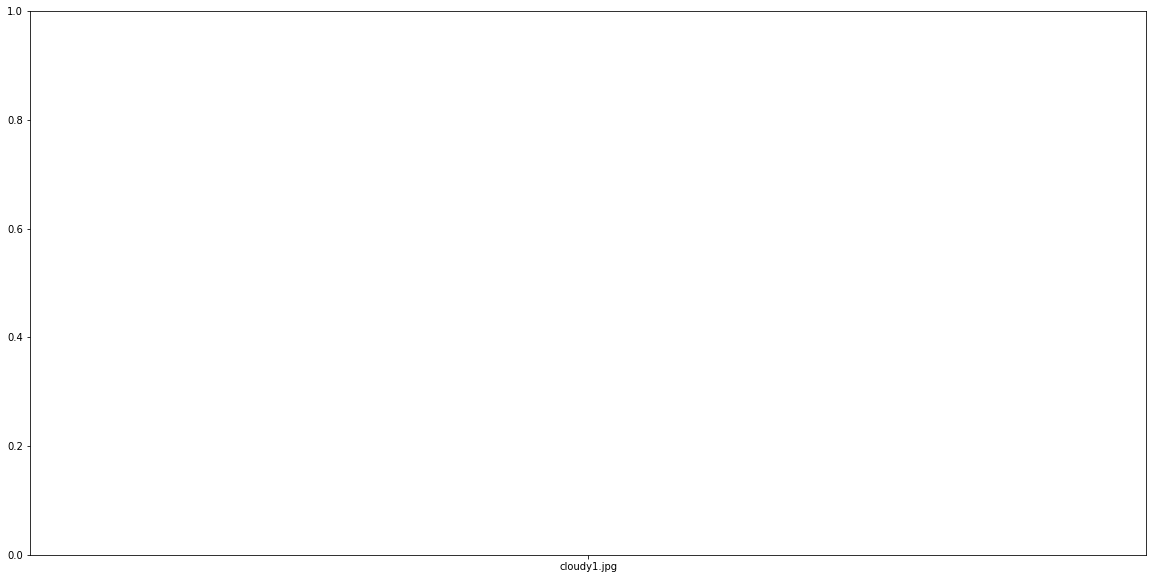

In [44]:
'''
# 4- Plot graph containing samples images from each class.
'''
# Write your code here
image_count_per_class = test_image_list
index = np.arange(len(images))
plt.figure(figsize=(20,10))
plt.bar(images,image_count_per_class)
plt.xlabel('Image Classes',fontsize=15)
plt.ylabel('Number of Images per class',fontsize=15)
plt.xticks(index,images,rotation=90)
plt.show()

In [49]:
'''
5- Find average of instances per class, considering complete dataset and 
Count how many classes are containing instances less than average (Display the results)?
'''

# Write your code here
average = total_instances/total_classes
classes_lessthan_avg = 0
for i in range(total_classes):
    if image_count_per_class[i]<average:
        classes_lessthan_avg = classes_lessthan_avg+1
print(classes_lessthan_avg, 'classes are less than average')


2 classes are less than average


In [52]:
'''
6- Perform data augmentation (only for shine and rain class, augment till 300 instances) to balance the data in 
each class, for augmenting, perform rotation over (-30 to 30) and horizontal flip. 
Make sure after this step, each class should contain same number of instances.
'''

# Write your code here
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 30% on the left and 30% on the right
    random_degree = random.uniform(-30, 30)
    return sk.transform.rotate(image_array, random_degree)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'horizontal_flip': horizontal_flip
}






#making aumented directory and copy the images to that directory
images1 = [os.path.join(dataset_dir, f) for f in os.listdir(dataset_dir) if os.path.isfile(os.path.join(dataset_dir, f))]
num_files_desired = 300


instance2 = ['rain{}.jpg'.format(i) for i in range(total_instances)]
count_class2_instances = 0
for i in range(total_instances):
    for j in range(total_instances):
        if instance2[j]==images[i]:
            count_class2_instances=count_class2_instances+1


instance3 = ['shine{}.jpg'.format(i) for i in range(total_instances)]
count_class3_instances = 0
for i in range(total_instances):
    for j in range(total_instances):
        if instance3[j]==images[i]:
for class_ in os.listdir(images):

    images = [os.path.join(dataset_dir, f) for f in os.listdir(dataset_dir) if os.path.isfile(os.path.join(dataset_dir, f))]
    num_generated_files = 0
    save_path = dataset_dir
    while num_generated_files <= num_files_desired:
        # random image from the folder
        image_path = random.choice(images)
        # read image as an two dimensional array of pixels
        image_to_transform = sk.io.imread(image_path)
        # random num of transformation to apply
        num_transformations_to_apply = random.randint(1, len(available_transformations))

        num_transformations = 0
        transformed_image = None
        
        while num_transformations <= num_transformations_to_apply:
            # random transformation to apply for a single image
            key = random.choice(list(available_transformations))
            transformed_image = available_transformations[key](image_to_transform)
            num_transformations += 1
            
        
        new_file_path = '%s/image_aug_%s.jpg' % (save_path, num_generated_files)

        # write image to the disk
        io.imsave(new_file_path, transformed_image)
        num_generated_files += 1

IndentationError: expected an indented block (<ipython-input-52-172bed39df5a>, line 46)

In [53]:
'''
7- Plot two graphs for original and after augmentation dataset in one plot for comparing.
'''

# Write your code here

aug_count_list = []
for aug_classe in dataset_dir:
    pathh = os.path.join(dataset_dir, aug_classe)
    imgs = [os.path.join(pathh, f) for f in os.listdir(pathh) if os.path.isfile(os.path.join(pathh, f))]
    aug_count_list.append(len(imgs))

index = np.arange(len(aug_classes))
plt.figure(figsize=(20,10))
plt.bar(aug_classes,aug_count_list)
plt.xlabel('Image Classes',fontsize=15)
plt.ylabel('Number of Images per class',fontsize=15)
plt.xticks(index,aug_classes,rotation=0)
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'weather-image-classification\\w'

In [70]:
'''
8- Split the data into train (80%) and test (20%). Make sure to create seperate directories.
'''

# Write your code here
new_train_test = os.path.join(dataset_dir,'new_train_test')
if (not(os.path.exists(new_train_test))):
    os.mkdir(new_train_test)

new_train = os.path.join(new_train_test,'train')
new_test = os.path.join(new_train_test,'test')
new_validate = os.path.join(new_train_test,'validate')

if (not(os.path.exists(new_train) and os.path.exists(new_test) and os.path.exists(new_validate))):
    os.mkdir(new_train)
    os.mkdir(new_test)    
    os.mkdir(new_validate)
    

src = dataset_dir
des = new_train
fnames = ['rain{}.jpg'.format(i) for i in range(250)]
for j in range(total_instances):
    for fname in fnames:
        for i in range(fnames):
            if fname[i]==images[i]:
                isrc = os.path.join(src, fname)
                ides = os.path.join(des, fname)
                shutil.copy(isrc,ides)

            
fnames = ['cloudy{}.jpg'.format(i) for i in range(250)]
for j in range(total_instances):
    for fname in fnames:
        for i in range(fnames):
            if fname[i]==images[i]:
                isrc = os.path.join(src, fname)
                ides = os.path.join(des, fname)
                shutil.copy(isrc,ides)
            
fnames = ['shine{}.jpg'.format(i) for i in range(250)]
for j in range(total_instances):
    for fname in fnames:
        for i in range(fnames):
            if fname[i]==images[i]:
                isrc = os.path.join(src, fname)
                ides = os.path.join(des, fname)
                shutil.copy(isrc,ides)            
            
fnames = ['sunrise{}.jpg'.format(i) for i in range(250)]
for j in range(total_instances):
    for fname in fnames:
        for i in range(fnames):
            if fname[i]==images[i]:
                isrc = os.path.join(src, fname)
                ides = os.path.join(des, fname)
                shutil.copy(isrc,ides)            
            
            
            
            
            

src = dataset_dir
des = new_test
fnames = ['rain{}.jpg'.format(i) for i in range(50)]
for j in range(total_instances):
    for fname in fnames:
        for i in range(fnames):
            if fname[i]==images[i]:
                isrc = os.path.join(src, fname)
                ides = os.path.join(des, fname)
                shutil.copy(isrc,ides)
            
fnames = ['cloudy{}.jpg'.format(i) for i in range(50)]
for j in range(total_instances):
    for fname in fnames:
        for i in range(fnames):
            if fname[i]==images[i]:
                isrc = os.path.join(src, fname)
                ides = os.path.join(des, fname)
                shutil.copy(isrc,ides)
                
                
fnames = ['shine{}.jpg'.format(i) for i in range(50)]
for j in range(total_instances):
    for fname in fnames:
        for i in range(fnames):
            if fname[i]==images[i]:
                isrc = os.path.join(src, fname)
                ides = os.path.join(des, fname)
                shutil.copy(isrc,ides)            
            
fnames = ['sunrise{}.jpg'.format(i) for i in range(50)]
for j in range(total_instances):
    for fname in fnames:
        for i in range(fnames):
            if fname[i]==images[i]:
                isrc = os.path.join(src, fname)
                ides = os.path.join(des, fname)
                shutil.copy(isrc,ides)            
            
            
            
            
            
            

TypeError: 'list' object cannot be interpreted as an integer

In [55]:
'''
9- Apply CNN model ONLY with following configuration:
    - Input Size: (150, 150, 3)
    - Hidden Layers: 3
    - Neurons each layer (128, 64, 32)
    - Activation Function each layer: ReLU
    - Filter Size: (3, 3) 
    - Activation function on output layer: Decide and use???
'''

# Write your code here
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))

'\n9- Apply CNN model ONLY with following configuration:\n    - Input Size: (150, 150, 3)\n    - Hidden Layers: 3\n    - Neurons each layer (128, 64, 32)\n    - Activation Function each layer: ReLU\n    - Filter Size: (3, 3) \n    - Activation function on output layer: Decide and use???\n'

In [ ]:
'''
10- Compile Model (use "adam" as optimizer, "categorical_crossentropy" as loss, "acc" as metrics) 
'''

# Write your code here
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])


In [65]:
'''
11- Train and test model on 30 epochs
'''

# Write your code here

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        new_train,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        new_validate,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=30)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


NameError: name 'model' is not defined

In [66]:
'''
12- Plot graph for train vs. test accuracy/loss
'''

# Write your code here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


NameError: name 'history' is not defined

In [ ]:
'''
13- Observe graphs and comment about the model in terms of underfitting, overfitting and well trained model. 
'''

# Write your code here
#if above code works I surely comment but now 'M speechless


In [ ]:
'''
14- Perform Experiments (Bonus Task)
    - Change number of layers/neurons
    - Change optimizer function as rmsprop
    - Train and compare graphs with each new experiment
'''

# Write your code here
